DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

--------------------------------------------------------------------------------------------------------------------------------
DATA COLLECTION

In [2]:
# Loading the dataset
file_path = "kag_risk_factors_cervical_cancer.csv"
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


--------------------------------------------------------------------------------------------------------------------------------
DATA PREPROCESSING

In [3]:
# Checking for missing values
print(data.isnull().sum())

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [4]:
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

# Convert all columns to numeric (if possible)
data = data.apply(pd.to_numeric, errors='coerce')

data.dropna()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
21,41,3.0,17.0,4.0,0.0,0.000000,0.000000,1.0,10.00,0.0,...,21.0,21.0,0,0,0,0,0,0,0,0
22,40,1.0,18.0,1.0,0.0,0.000000,0.000000,1.0,0.25,0.0,...,2.0,2.0,0,0,0,0,0,1,1,1
59,35,3.0,17.0,4.0,0.0,0.000000,0.000000,1.0,7.00,1.0,...,19.0,19.0,0,0,0,0,0,0,0,0
68,35,3.0,20.0,2.0,0.0,0.000000,0.000000,0.0,0.00,1.0,...,3.0,3.0,0,0,0,0,0,0,0,0
78,35,3.0,17.0,6.0,1.0,13.000000,2.600000,1.0,7.00,0.0,...,12.0,12.0,0,0,0,0,0,1,0,0
84,36,2.0,15.0,3.0,0.0,0.000000,0.000000,0.0,0.00,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
101,30,5.0,16.0,4.0,0.0,0.000000,0.000000,0.0,0.00,1.0,...,11.0,11.0,0,0,0,0,0,0,1,0
112,30,3.0,19.0,2.0,0.0,0.000000,0.000000,1.0,9.00,0.0,...,9.0,9.0,0,0,0,0,0,0,0,0
134,30,3.0,14.0,3.0,0.0,0.000000,0.000000,1.0,12.00,1.0,...,7.0,7.0,0,0,0,0,0,0,1,0
147,29,4.0,10.0,5.0,0.0,0.000000,0.000000,0.0,0.00,0.0,...,8.0,8.0,0,0,0,0,0,0,0,0


--------------------------------------------------------------------------------------------------------------------------------
DATA VISUALISATION

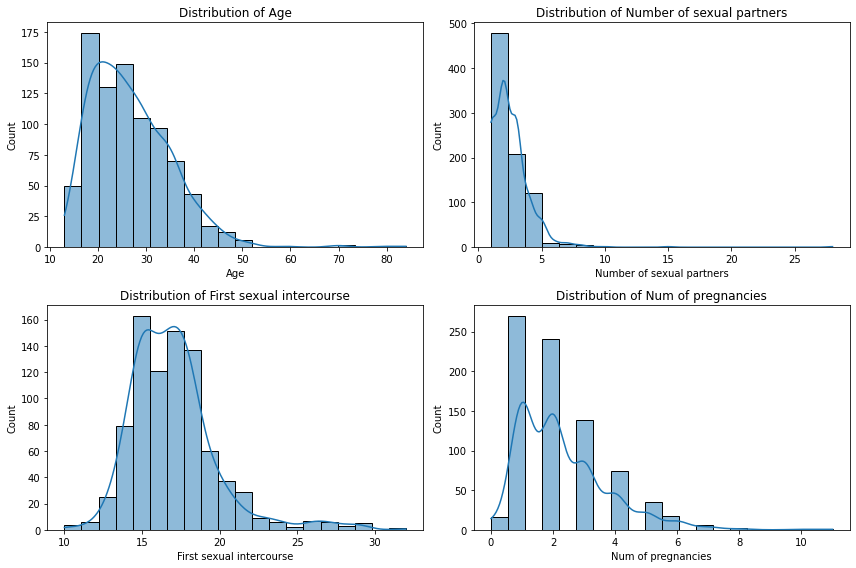

In [5]:
# Plot histograms for numerical columns
numerical_columns = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col].dropna(), bins=20, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

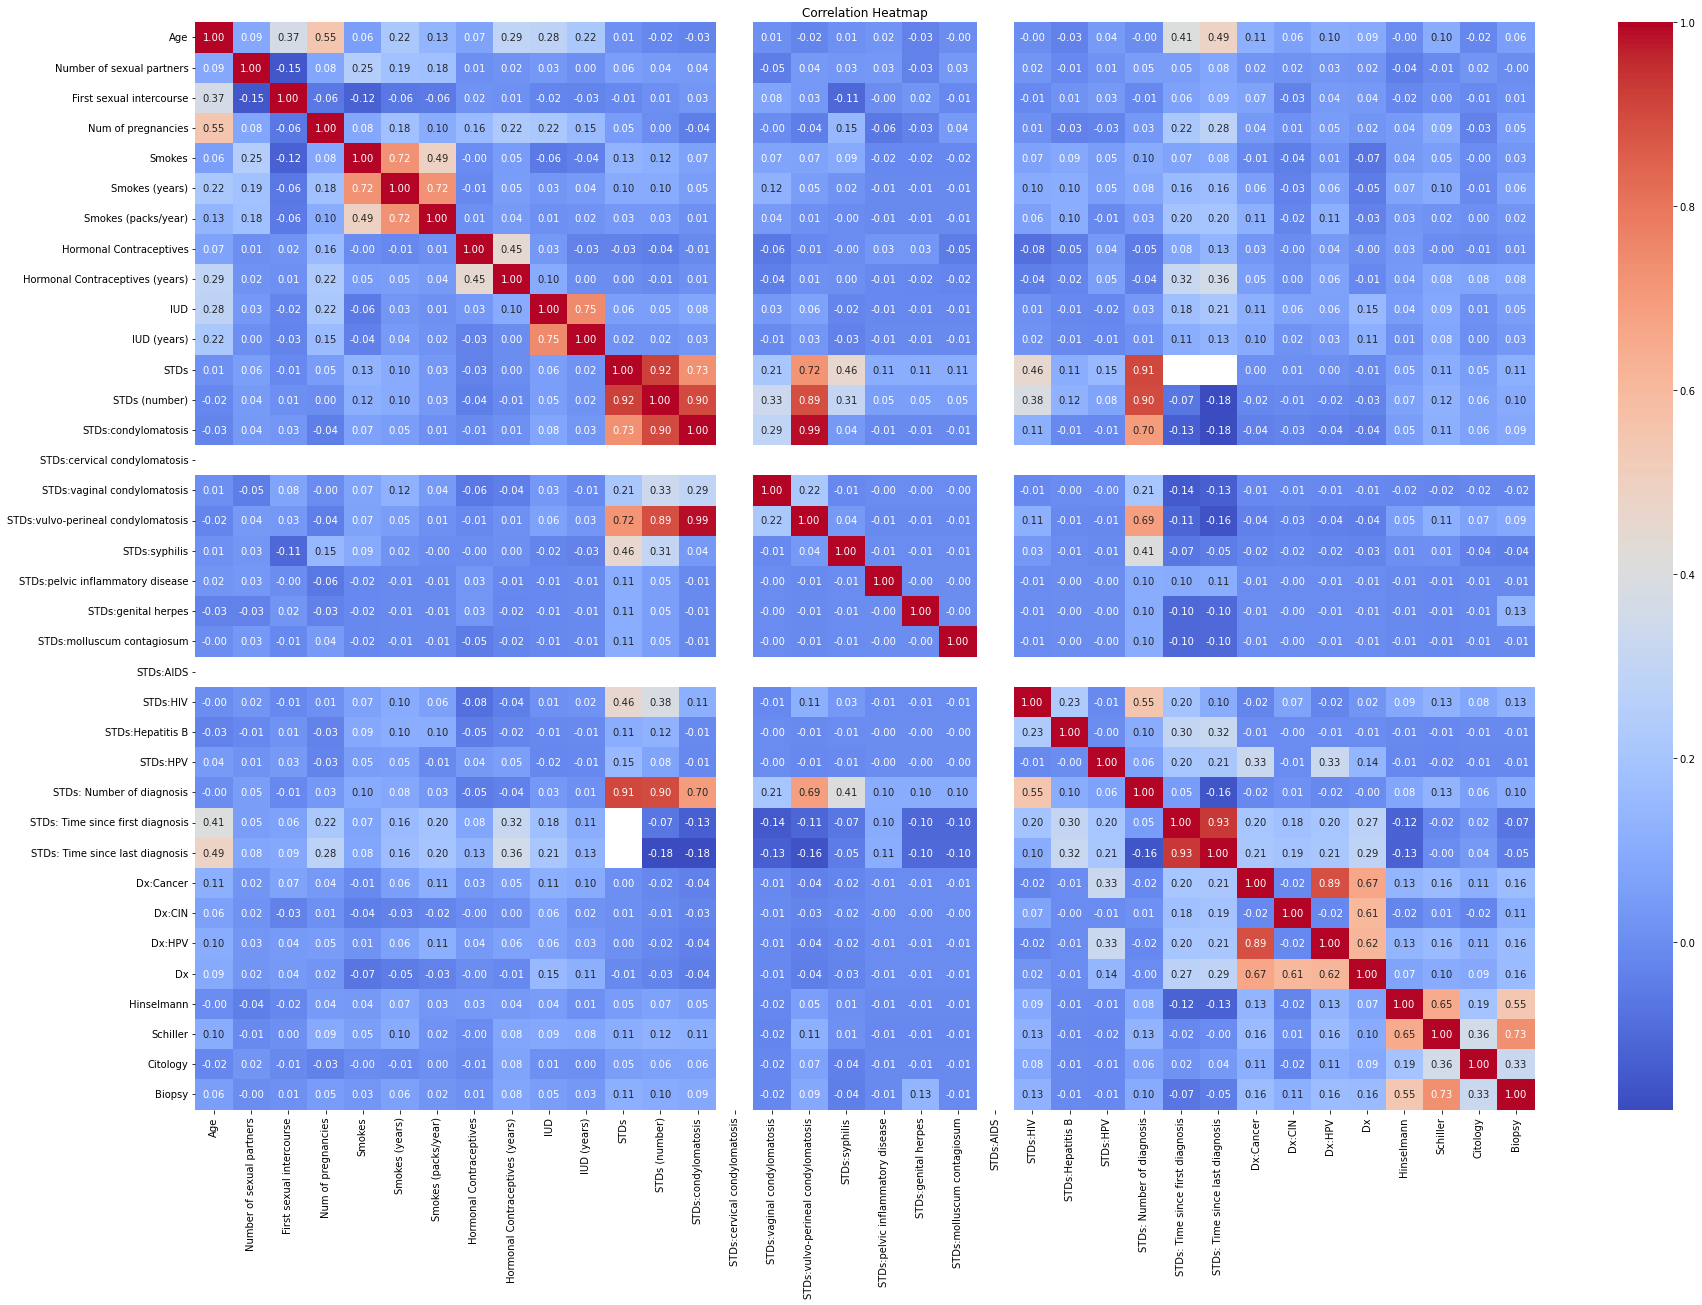

In [6]:
# Correlation heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

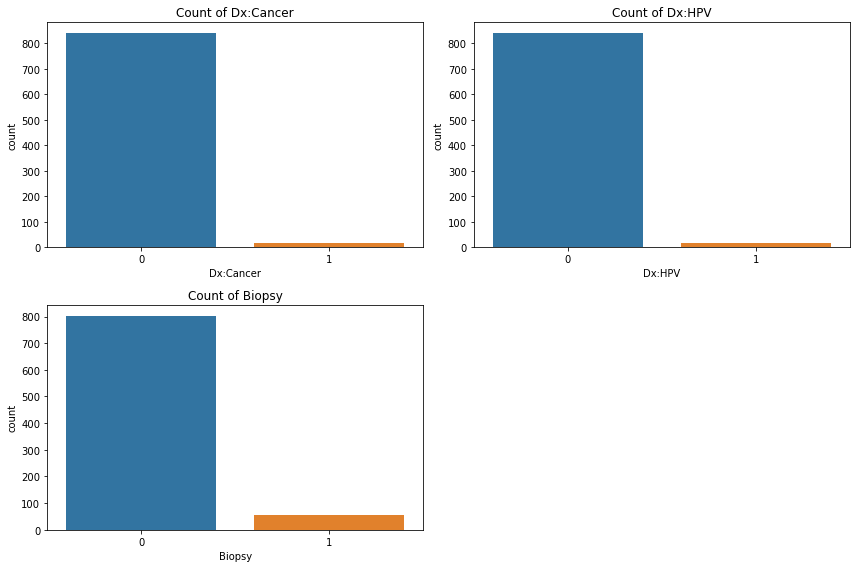

In [7]:
# Count plot for categorical features
categorical_columns = ['Dx:Cancer', 'Dx:HPV', 'Biopsy']

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=data[col])
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

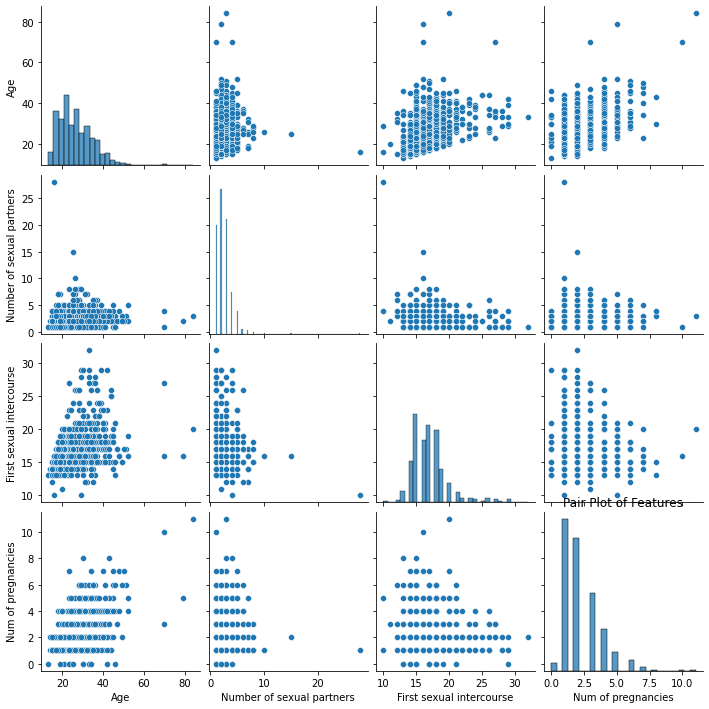

In [8]:
sns.pairplot(data[['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies']].dropna())
plt.title('Pair Plot of Features')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------
TRAIN & TEST SPLIT

In [9]:
# Features (X) - all columns except 'Dx'
X = data.drop(columns=['Dx'])

# Target (y) - 'Dx' column
y = data['Dx']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

--------------------------------------------------------------------------------------------------------------------------------
MODEL TRAINING, TESTING & VALIDATION

Model: Logistic Regression
Accuracy: 0.9825581395348837
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       165
           1       0.83      0.71      0.77         7

    accuracy                           0.98       172
   macro avg       0.91      0.85      0.88       172
weighted avg       0.98      0.98      0.98       172

Confusion Matrix:
 [[164   1]
 [  2   5]]
------------------------------
Model: Decision Tree
Accuracy: 0.9941860465116279
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       165
           1       1.00      0.86      0.92         7

    accuracy                           0.99       172
   macro avg       1.00      0.93      0.96       172
weighted avg       0.99      0.99      0.99       172

Confusion Matrix:
 [[165   0]
 [  1   6]]
------------------------------
Model: Random Forest
Accuracy: 0.9825581395348

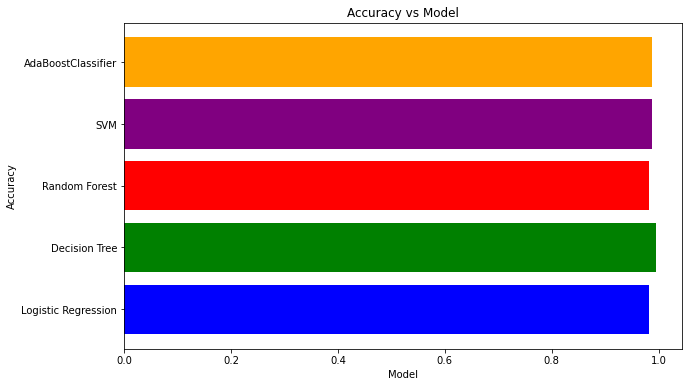

In [11]:
# Assuming X_train and X_test have missing values, we will fill them
imputer = SimpleImputer(strategy='mean')

# Fiting the imputer on training data and transform both train and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initializing models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "AdaBoostClassifier": AdaBoostClassifier()
}

# Lists to store model names and accuracy scores
model_names = []
acc_scores = []

# Training models and evaluate
for name, model in models.items():
    model.fit(X_train_imputed, y_train)  
    y_pred = model.predict(X_test_imputed)  
    acc = accuracy_score(y_test, y_pred)
    
    # Storeing the model name and accuracy score
    model_names.append(name)
    acc_scores.append(acc)
    
    print(f"Model: {name}")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 30)

# Ploting the accuracies of the models
plt.figure(figsize=(10, 6))
plt.barh(model_names, acc_scores, color=['blue', 'green', 'red', 'purple', 'orange'])

# Adding title and labels
plt.title('Accuracy vs Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Show plot
plt.show()

In [ ]:
import pickle

# Save the trained model
with open('../saved_models/model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the scaler
with open('../saved_models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)